In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'

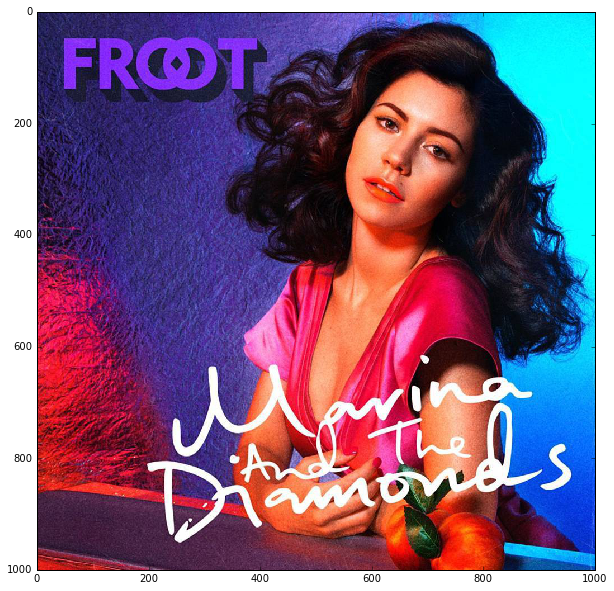

In [2]:
from PIL import Image
height = 480
width = 480
image = Image.open("froot.jpg")
plt.imshow(image)

In [3]:
image = image.resize((height, width))
image = np.asarray(image) / 255.
image = image.astype('float32')

In [4]:
num_batch = 10

downsample = 1.3

# repeat Image 3 times to simulate batches.
X_in = np.concatenate([[image.copy() for _ in range(num_batch)]])
X_in = X_in.transpose(0, 3, 1, 2)

In [5]:
# mirror
w = np.zeros((20, 6))
b = np.zeros((6,))
b[0] = -1.
b[4] = 1.
print b.reshape(2, 3)

[[-1.  0.  0.]
 [ 0.  1.  0.]]


In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten, merge, Lambda
from SpatialTransformer import *

inputdata = Input(shape=(3, height, width))
fla = Flatten()(inputdata)
dense1 = Dense(20)(fla)
dense2 = Dense(6, weights=[w, b])(dense1)
trans = SpatialTransformerLayer(downsample_factor=downsample)([inputdata, dense2])
model = Model(input=inputdata, output=[trans, dense2])

Using Theano backend.
Using gpu device 0: GeForce GTX 860M (CNMeM is enabled with initial size: 80.0% of memory, CuDNN not available)


In [7]:
out, theta = model(X_in)

In [8]:
import theano 
f = theano.function([model.layers[0].input], [model.layers[4].output, model.layers[3].output])
out, theta = f(X_in)

In [9]:
print theta[0]

[-1.  0.  0.  0.  1.  0.]


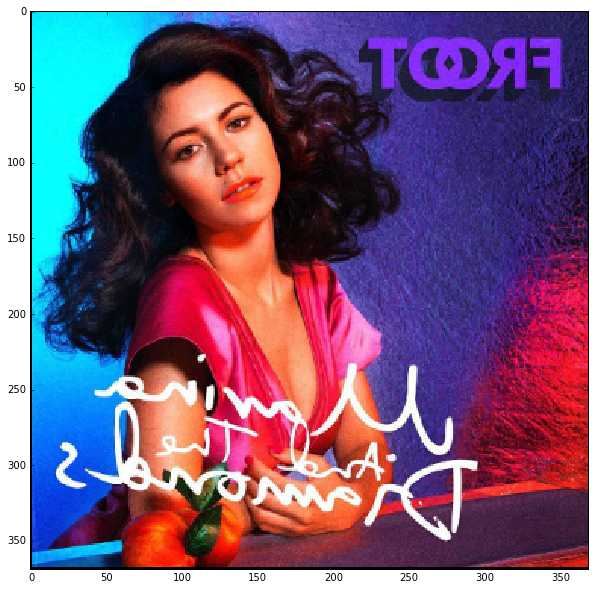

In [10]:
rst = out[0].transpose(1, 2, 0)
plt.imshow(rst)